<a href="https://colab.research.google.com/github/Bio-MingChen/DL_practice_by_Colab/blob/main/pytorch_test20250803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [48]:
torch.__version__

'2.6.0+cu124'

In [58]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


In [10]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [12]:
training_data[0][1]

9

In [59]:
batch_size = 64
train_dataloader = DataLoader(training_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=True)

In [17]:
for X,y in test_dataloader:
  print(f"Shape of X [N,C,H,W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N,C,H,W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [25]:
next(iter(train_dataloader))[1].shape


torch.Size([64])

Text(0.5, 1.0, 'Ankle Boot')

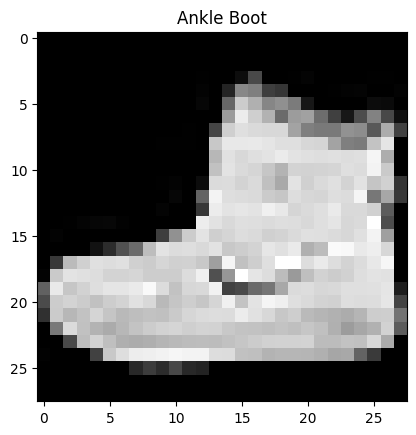

In [31]:
import matplotlib.pyplot as plt
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
img = training_data[0][0]
label = training_data[0][1]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(labels_map[label])

In [34]:
img.squeeze().shape

torch.Size([28, 28])

In [36]:
img.squeeze().unsqueeze(0).shape


torch.Size([1, 28, 28])

在 Python 的 `numpy` 和 `PyTorch`（以及 `TensorFlow`）中，`squeeze()` 是一个非常常用的函数，它的作用是：

> **移除形状中为 1 的维度（size为1的维度）**

---

## 🔧 基本用法

### NumPy 中：

```python
import numpy as np

x = np.array([[[1], [2], [3]]])  # shape: (1, 3, 1)
x_squeezed = np.squeeze(x)       # shape: (3,)

print(x.shape)        # (1, 3, 1)
print(x_squeezed.shape)  # (3,)
```

### PyTorch 中：

```python
import torch

x = torch.zeros(1, 3, 1)
x_squeezed = x.squeeze()

print(x.shape)        # torch.Size([1, 3, 1])
print(x_squeezed.shape)  # torch.Size([3])
```

---

## 🧠 什么时候会用到 `squeeze()`？

### 1. **去掉多余的维度方便计算**

很多时候加载数据或某些操作后，张量会多出不必要的 `1` 维度，可能会影响后续的计算，比如：

```python
y = model(x)  # y shape: (batch_size, 1)
loss = loss_fn(y.squeeze(), target)  # 将 shape (batch_size, 1) -> (batch_size,)
```

### 2. **匹配维度**

在计算 loss 或进行张量拼接（concatenate）时，维度不一致会报错，常见的做法就是用 `.squeeze()` 或 `.unsqueeze()` 来调整。

### 3. **输出单个值**

例如：

```python
x = torch.tensor([[[42]]])
print(x.squeeze())  # tensor(42)
```

---

## 🧩 还可以指定要去掉的维度

```python
x = torch.randn(1, 3, 1)
x_squeeze_dim0 = x.squeeze(0)  # 去掉第0维
x_squeeze_dim2 = x.squeeze(2)  # 去掉第2维
```

⚠️ 如果指定的维度不为1，会报错。

---

## 🚫 注意事项

* 只会去掉**维度是1**的部分；
* `.squeeze()` 是不改变原张量的，需要赋值或使用 inplace 版本（如 `x.squeeze_()`）；
* 可能会不小心把 batch 维度（维度为 1）挤掉，导致后续模型处理出错，所以要小心在什么时候用。

---

## ✅ 总结一句话：

> `squeeze()` 就是在你不想要多余的 1 维时，把它“挤掉”，常用于模型输出、reshape、数据对齐等场景。

如果你有某段代码想确认是否需要 `.squeeze()`，可以发给我，我来帮你判断。


In [62]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [64]:
28*28

784

In [65]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(512,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(512,10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

| 层             | 作用                             |
| ------------- | ------------------------------ |
| `Linear`      | 全连接层，产生线性变换                    |
| `BatchNorm1d` | 对线性输出做标准化，**稳定训练过程**，减轻内部协变量偏移 |
| `ReLU`        | 非线性激活，给模型引入非线性能力               |
| `Dropout`     | 在训练时随机丢弃部分激活值，**防止过拟合**        |


当然可以，下面是用**通俗易懂的方式**解释 `BatchNorm1d` 的作用：

---

## 🧠 一句话总结：

> **BatchNorm1d 就像是在每一层神经网络“做标准化处理”，帮你把数据“整理整齐”，让网络更容易学得快、学得稳、不容易崩。**

---

## 🧩 为什么要用 BatchNorm？

想象你在教一个学生（神经网络）学习做题（训练任务）：

* 如果题目（输入）格式很混乱，有的大有的小，有的全是负数，有的突然变大了；
* 学生就会很难适应，学习过程会很不稳定，容易学崩、学慢。

**BatchNorm 的作用就是把这些题目统一格式**：

> 让数据变得“平均值是 0，标准差是 1”（标准化）

这样学生就能**快速进入状态，集中精力做题（学习）**，不会因为题目形式变化而“心态崩了”。

---

## 🔧 BatchNorm1d 在干啥？

以一句代码为例：

```python
nn.BatchNorm1d(512)
```

这个意思是说：对每个 batch 里的样本，在 `512` 维度上分别做如下操作：

### 每一维特征都会：

1. **计算当前 batch 的均值和方差**
2. **把这维的数据标准化** → 减去均值 / 除以标准差
3. **再乘一个“可学习的缩放因子” γ，加一个“偏移量” β**

最终输出的是一个**标准化后还带有一定灵活性**的特征。

---

## 💡 举个例子来形象理解：

假设你喂给神经网络的数据是这样的：

```python
[[-100, 0, 300],
 [ -90, 1, 280],
 [-110, -1, 310]]
```

这个差异非常大，模型难学。

BatchNorm 就会帮你把每一列**缩放和移动**，变成像这样：

```python
[[ 0.1, -0.2,  0.5],
 [-0.1,  0.0,  0.3],
 [-0.2,  0.2, -0.8]]
```

现在这些值就“整齐”多了，模型更容易处理。

---

## ✅ 优点总结：

| 优点        | 类比                  |
| --------- | ------------------- |
| 训练更快      | 学生面对统一格式的题，刷题效率提升   |
| 训练更稳定     | 不容易“梯度爆炸/消失”        |
| 减少对初始化的依赖 | 不用太担心初始权重选不好        |
| 有轻微正则化效果  | 有点像 Dropout，能稍微防过拟合 |

---

## 🤔 为什么叫 `BatchNorm1d`？

因为它是在**每一个 batch 上做“1D 的特征标准化”**（通常用于 `Linear` 层的输出），所以叫 `1d`。
如果是 `Conv2d` 那种图像数据，就要用 `BatchNorm2d`。

---

## ✅ 总结一句通俗话：

> **BatchNorm1d 就是帮你的网络“整顿输入秩序”，标准化每一层的数据，让学习更高效、更稳定，不容易崩。**

需要我用图示或动画形式解释，也可以画图给你看。


非常好！你提到了几个深度学习中最关键的部分：**ReLU 激活函数、交叉熵损失函数 CrossEntropyLoss，以及 SGD 优化器**。我会一一给出它们的**公式、图像和作用解释**。

---

## ✅ 一、ReLU（Rectified Linear Unit）激活函数

### 🔸 公式：

$$
\text{ReLU}(x) = \max(0, x)
$$

也就是说：

* 如果 $x > 0$，输出就是 $x$
* 如果 $x \leq 0$，输出就是 0

### 🔸 图像：

```python
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = np.maximum(0, x)

plt.plot(x, y)
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()
```

（你可以运行上面代码看看图像，也可以我帮你画出图来）

---

### 🔸 作用：

* 引入非线性，使神经网络可以学习复杂的函数；
* 计算简单，训练快速；
* 但可能出现“神经元死亡”问题（ReLU 输出长期为0）。

---

## ✅ 二、`nn.CrossEntropyLoss()`

### 🔸 用途：

这是 **分类任务**中最常用的损失函数，适用于 `model` 的输出是 **logits**（未经过 `softmax` 的得分）。

---

### 🔸 计算过程分为两步（PyTorch 内部自动做的）：

1. **先对 logits 做 softmax 得到预测概率：**

$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

其中：

* $z_i$：模型输出的第 $i$ 类的 logit
* $\hat{y}_i$：softmax 后的概率

2. **再计算交叉熵损失（Cross Entropy）：**

$$
\text{Loss} = -\sum_{i} y_i \log(\hat{y}_i)
$$

其中：

* $y_i$ 是 one-hot 标签（只有一个 1 其他都是 0）
* 实际计算时只保留正确标签那一项：$-\log(\hat{y}_{\text{true class}})$

---

### 🔸 举个例子：

如果你的模型输出是：

```python
logits = [2.0, 1.0, 0.1]  # 表示三个类别的得分
label = 0  # 正确类别是第0类
```

PyTorch 自动计算：

```python
softmax = [0.659, 0.242, 0.099]
loss = -log(0.659) ≈ 0.417
```

---

## ✅ 三、`torch.optim.SGD(...)` 随机梯度下降优化器

### 🔸 公式：

每一轮迭代中，更新参数的公式是：

$$
\theta = \theta - \eta \cdot \nabla_{\theta} \mathcal{L}
$$

其中：

* $\theta$：模型参数
* $\eta$：学习率（如 `1e-3`）
* $\nabla_{\theta} \mathcal{L}$：损失函数对参数的梯度

---

### 🔸 你写的代码：

```python
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
```

意思是：

* 用 **交叉熵** 来评估分类误差；
* 用 **学习率为 0.001 的 SGD 优化器** 来更新模型参数；
* 每个 batch 后执行：

```python
loss.backward()        # 计算梯度
optimizer.step()       # 根据梯度更新参数
optimizer.zero_grad()  # 清空上一次的梯度
```

---

## ✅ 总结表格：

| 项目                   | 公式                                                       | 用途         |
| -------------------- | -------------------------------------------------------- | ---------- |
| **ReLU**             | $\max(0, x)$                                             | 激活函数，增加非线性 |
| **CrossEntropyLoss** | $-\log(\hat{y}_{\text{true class}})$                     | 分类任务损失     |
| **SGD**              | $\theta = \theta - \eta \cdot \nabla_\theta \mathcal{L}$ | 梯度下降优化参数   |

---

如果你希望我把 ReLU 和 Softmax 的图画出来展示，也可以告诉我，我可以直接输出图片给你看。是否还想继续了解 Adam 优化器、学习率调度器之类的内容？


很好！这两个概念非常关键：**logits** 和 **softmax** 是在分类神经网络中经常遇到的术语。

我来用通俗易懂的方式给你讲清楚它们的区别和作用：

---

## ✅ 一、什么是 **logits**？

### 🔹一句话定义：

> **logits 就是神经网络最后一层的原始输出分数**，还没有经过归一化，也不是概率。

---

### 🔹举个例子：

假设你要做一个 3 分类问题（比如识别猫🐱、狗🐶、鸟🐦）
你喂一张图给模型，它最后输出：

```python
logits = [2.5, 0.3, -1.2]
```

这就是 logits：

* 原始分数
* 可以是正的、负的、任意大的
* **不满足概率分布**

---

## ✅ 二、什么是 **softmax**？

### 🔹一句话定义：

> **softmax 会把 logits 转换成“概率分布”**，每一类的得分变成了 0\~1 之间的概率，所有概率加起来是 1。

---

### 🔹公式：

$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

其中：

* $z_i$：logits 中第 i 类的分数
* $\hat{y}_i$：softmax 输出的概率

---

### 🔹对前面例子的处理：

```python
logits = [2.5, 0.3, -1.2]
```

经过 softmax 后：

```python
softmax_probs = [0.81, 0.15, 0.04]  # 这些就是概率
```

这意味着：

* 模型认为这张图是“猫”的概率是 81%
* 是狗的概率是 15%
* 是鸟的概率是 4%

---

## 🧠 logits vs softmax：比较总结

| 比较项    | logits                  | softmax 结果            |
| ------ | ----------------------- | --------------------- |
| 值范围    | 任意实数                    | (0, 1) 之间             |
| 是否是概率  | ❌ 不是                    | ✅ 是                   |
| 是否归一化  | ❌ 否                     | ✅ 是（总和 = 1）           |
| 模型输出格式 | 模型最后一层输出                | softmax 是对 logits 的处理 |
| 用于哪    | 供 `CrossEntropyLoss` 使用 | 用于推理 / 可视化分类概率        |

---

## ✅ CrossEntropyLoss 自动帮你做了 softmax！

你不需要手动 `softmax(logits)`，因为：

```python
nn.CrossEntropyLoss()
```

这个函数内部已经**自动对 logits 做了 softmax 计算**，然后才算 loss。

所以你只需要把 `logits` 输出给它即可。

---

## ✅ 总结一句话：

> **logits 是模型输出的“原始分数”，softmax 是把这些分数转成概率的函数。**

如果你想看 softmax 的图像、或者想自己实现 softmax，我可以也帮你画图或给代码。需要的话说一声！


这是一个非常经典的问题！💡**SGD（随机梯度下降）** 和 **Adam（自适应矩估计）** 是两种常用的深度学习优化器，它们的目标都是：

> **通过不断更新参数，让模型损失最小化**

但它们**更新参数的方式不同**，各有优缺点。

---

## ✅ 一张表先概括它们的区别：

| 特性         | SGD                  | Adam                        |
| ---------- | -------------------- | --------------------------- |
| 是否自适应学习率   | ❌ 否                  | ✅ 是（每个参数都有自己的学习率）           |
| 是否用动量      | ✅ 可选（SGD + Momentum） | ✅ 自带                        |
| 依赖过去梯度的平均值 | ❌ 否                  | ✅ 是（1阶和2阶矩估计）               |
| 超参数敏感性     | 较高                   | 较低                          |
| 收敛速度       | 慢（但稳）                | 快                           |
| 是否容易过拟合    | 较不容易                 | 有时会更容易过拟合                   |
| 适合         | 简单任务、大数据、容易泛化        | 稀疏梯度、复杂结构（如RNN、Transformer） |
| 典型使用场景     | 经典CNN训练、简洁任务         | NLP、Transformer、预训练模型       |

---

## ✅ 一、SGD（Stochastic Gradient Descent）

### 📘 公式：

$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta \mathcal{L}(\theta_t)
$$

* $\theta$：模型参数
* $\eta$：学习率
* $\nabla_\theta \mathcal{L}$：损失对参数的梯度

### 🧠 特点：

* 每次用一个小批量（batch）数据计算梯度 → 更快迭代；
* 容易陷入局部最小值；
* 可加 momentum 增强稳定性：

$$
v_{t+1} = \mu v_t - \eta \cdot \nabla_\theta \mathcal{L} \\
\theta_{t+1} = \theta_t + v_{t+1}
$$

---

## ✅ 二、Adam（Adaptive Moment Estimation）

### 📘 公式概要：

Adam 结合了：

* **Momentum**（一阶矩估计，梯度的指数加权平均）；
* **RMSProp**（二阶矩估计，平方梯度的平均）；

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \quad \text{(一阶动量)} \\
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \quad \text{(二阶动量)} \\
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \quad \text{(偏差修正)} \\
\theta_{t+1} = \theta_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

### 🧠 特点：

* 学习率 **自动适应每个参数**；
* 非常适合稀疏梯度的任务（如 NLP 中的词向量训练）；
* 初始化不敏感，训练更稳定；
* 收敛快，但可能泛化能力差（容易过拟合）；

---

## ✅ 简单理解：

| 类比   | SGD           | Adam                  |
| ---- | ------------- | --------------------- |
| 你走迷宫 | 拿一张纸（当前梯度）照着走 | 手里拿指南针（过去方向）和地图（梯度分布） |
| 走法   | 方向直来直去，可能被困   | 会绕路，会加速，会避免重复走错路      |

---

## ✅ 实践建议

* 🔹 **默认用 Adam**，如果你不确定或者任务很复杂；
* 🔹 想要更好的**泛化能力**，可以考虑 **SGD + Momentum**；
* 🔹 在预训练阶段用 Adam，在微调阶段换成 SGD 也很常见。

---

## ✅ 总结一句话：

> **Adam 是“聪明的自动驾驶”，跑得快也稳；SGD 是“手动挡老司机”，慢但容易控制，容易泛化。**

---

如果你想了解它们在具体项目中的表现（比如训练 ResNet、BERT 等模型时的表现），我可以继续补充对比案例。是否需要我演示一段两者对比训练的代码？


非常好！`CrossEntropyLoss` 是分类问题中最常见的损失函数。它结合了 **Softmax + 负对数似然（Negative Log Likelihood）** 两个步骤，适用于**多分类**任务。

---

## ✅ 一、CrossEntropyLoss 的计算公式

对于一个样本的损失（假设类别总数是 $C$，模型输出 logits 是 $\mathbf{z} = [z_1, z_2, ..., z_C]$，正确标签是第 $y$ 类）：

1. **先做 softmax 得到概率分布**：

$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
$$

2. **再对真实类别 $y$ 计算负对数概率**（交叉熵）：

$$
\text{Loss} = -\log(\hat{y}_y)
$$

---

## ✅ 二、实际例子讲解（手动计算）

假设你有 3 个类别，模型输出 logits：

```python
logits = [2.0, 1.0, 0.1]
label = 0  # 正确类别是第 0 类
```

### 第一步：softmax

$$
\begin{align*}
e^{2.0} &= 7.389 \\
e^{1.0} &= 2.718 \\
e^{0.1} &= 1.105 \\
\text{总和} &= 7.389 + 2.718 + 1.105 = 11.212 \\
\end{align*}
$$

得到 softmax 概率：

```python
[7.389/11.212, 2.718/11.212, 1.105/11.212] ≈ [0.659, 0.242, 0.099]
```

### 第二步：交叉熵损失

由于正确标签是第 0 类（概率是 0.659）：

$$
\text{Loss} = -\log(0.659) ≈ 0.417
$$

---

## ✅ 三、PyTorch 中的代码实现

```python
import torch
import torch.nn as nn

logits = torch.tensor([[2.0, 1.0, 0.1]])  # shape: [batch_size=1, num_classes=3]
labels = torch.tensor([0])  # 正确类别为 class 0

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(logits, labels)

print(loss.item())  # 输出大约 0.417
```

---

## ⚠️ 注意事项

* **输入 logits 不要先做 softmax**，PyTorch 的 `CrossEntropyLoss` 会**自动内部处理 softmax**；
* `logits` 的 shape 是 `[batch_size, num_classes]`；
* `labels` 是整型类别索引（不是 one-hot 向量），shape 是 `[batch_size]`；

---

## ✅ 总结一句话：

> `CrossEntropyLoss = -log(正确类别的 softmax 概率)`，它度量模型“对正确答案的信心”，越不自信，损失越大。

---

是否还想看多个样本 batch 下的交叉熵计算？或者 one-hot 标签与交叉熵的关系？我可以继续讲。


In [72]:
print(len(train_dataloader))
len(train_dataloader.dataset)

938


60000

In [76]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



非常棒的问题！你提到了两个深度学习训练过程中很关键但容易被忽略的细节：`model.train()` vs `model.eval()` 以及 test 中 loss 的计算。

---

## ✅ 一、`model.train()` 和 `model.eval()` 是干嘛的？

这两个方法是用于**切换模型的工作模式**的，它们不会直接影响 forward 运算的逻辑，但会影响**某些特定层的行为**，比如：

| 模型层类型       | 在 `train()` 模式下行为  | 在 `eval()` 模式下行为 |
| ----------- | ------------------ | ---------------- |
| `Dropout`   | 每次随机丢掉一部分神经元       | 不进行 Dropout（即不丢） |
| `BatchNorm` | 使用当前 batch 统计量做标准化 | 使用训练时保存的全局均值和方差  |

### ✳️ 你代码中就有这些层：

```python
nn.Dropout(0.2),
nn.BatchNorm1d(512),
```

所以：

* 在训练时，使用 `model.train()` 是必须的，否则 Dropout 和 BatchNorm 不会生效；
* 在测试/验证时，使用 `model.eval()` 是必须的，否则这些层的行为会导致结果不稳定或错误。

---

## ✅ 二、关于 test 中 loss 的计算方式

你说得没错，test 中每个 batch 的 loss 是不同的。但是代码这样处理：

```python
test_loss += loss_fn(pred, y).item()  # 累加每个 batch 的 loss
...
test_loss /= num_batches              # 最后除以 batch 数
```

这是在**计算所有 batch 的平均 loss（即平均每个 batch 的损失）**，这种写法虽然不是最严格的“平均每个样本的损失”，但**在 batch size 相同的情况下是等价的**。

### 🧠 如果你想更严格，可以这样写：

```python
test_loss += loss_fn(pred, y).item() * X.size(0)  # 按照每个样本加权累加
...
test_loss /= size  # 最后除以总样本数
```

这种方式更精确，适合在 batch size 不一致时使用。

---

## ✅ 总结一句话：

* `model.train()`：设置为训练模式，**启用 Dropout 和 BatchNorm 训练行为**；
* `model.eval()`：设置为测试模式，**关闭 Dropout，用 BatchNorm 的历史均值**；
* 测试 loss 的写法没错，但在 batch size 不一致时建议加权平均。

---

如果你愿意，我可以帮你写一个完整版本的 `train` + `test` 框架，包括日志记录、早停、可视化等功能。是否需要？


这是一个非常关键的问题，很多初学者容易误解！你问的是：

> `loss.item()` 是不是只取了第一个样本的 loss？

### ✅ 答案是：**不是！`loss.item()` 是整个 batch 的平均 loss（标量）**

---

## 🔍 详细解释：

你在代码中计算了：

```python
loss = loss_fn(pred, y)  # pred.shape: (batch_size, num_classes)
```

PyTorch 中默认的 `loss_fn = nn.CrossEntropyLoss()` **返回的是整个 batch 的平均 loss**，也就是说：

$$
\text{loss} = \frac{1}{N} \sum_{i=1}^N \text{CrossEntropy}(y_i, \hat{y}_i)
$$

其中 $N$ 是当前 batch 的大小。

---

### 🔸 那 `loss.item()` 是做什么的？

`loss` 是一个张量（`tensor(0.3874, grad_fn=...)`），它还带着计算图。

> `loss.item()` 是把这个张量里的**单个标量值取出来**，变成 Python 的 float，方便你打印、记录或存入日志文件。

---

### ✅ 举个例子：

假设你的 batch size 是 64，模型对这 64 个样本都做了预测，`loss_fn` 会返回：

```python
loss = tensor(0.3472, grad_fn=<...>)
```

你再执行：

```python
loss.item()  # → 0.3472（float 类型）
```

这个数值就是**这 64 个样本的平均 loss**，不是某一个样本的 loss。

---

## ✅ 补充：想要每个样本的 loss 怎么做？

可以用 `reduction='none'` 的方式：

```python
loss_fn = nn.CrossEntropyLoss(reduction='none')
losses = loss_fn(pred, y)  # shape: (batch_size,)
```

此时：

* `losses[i]` 就是第 `i` 个样本的 loss；
* 如果你想自己算平均，可以：

  ```python
  loss = losses.mean()
  ```

---

## ✅ 总结一句话：

> `loss.item()` 是整个 batch 的平均 loss（一个标量），**不是第一个样本的 loss**，它只是把 tensor 转为 float。

如果你想要打印每个样本的损失，我可以帮你改一下代码展示。是否需要？


In [77]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n -------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
 -------------------------------
loss: 2.351133 [   64/60000]
loss: 1.504371 [ 6464/60000]
loss: 1.231074 [12864/60000]
loss: 1.036299 [19264/60000]
loss: 0.953311 [25664/60000]
loss: 0.944878 [32064/60000]
loss: 0.852010 [38464/60000]
loss: 0.914644 [44864/60000]
loss: 0.760960 [51264/60000]
loss: 0.678545 [57664/60000]
Test Error: 
 Accuracy: 77.0%, Avg loss: 0.725412 

Epoch 2
 -------------------------------
loss: 0.797271 [   64/60000]
loss: 0.630035 [ 6464/60000]
loss: 0.684512 [12864/60000]
loss: 0.679657 [19264/60000]
loss: 0.832178 [25664/60000]
loss: 0.604194 [32064/60000]
loss: 0.648339 [38464/60000]
loss: 0.796758 [44864/60000]
loss: 0.723518 [51264/60000]
loss: 0.660618 [57664/60000]
Test Error: 
 Accuracy: 80.1%, Avg loss: 0.592749 

Epoch 3
 -------------------------------
loss: 0.732579 [   64/60000]
loss: 0.669723 [ 6464/60000]
loss: 0.673791 [12864/60000]
loss: 0.489371 [19264/60000]
loss: 0.478027 [25664/60000]
loss: 0.461428 [32064/60000]
loss: 0.515199 [384

In [78]:
torch.save(model.state_dict(), "model.pth")
print("Save PyTorch Model State to model.pth")

Save PyTorch Model State to model.pth


In [ ]:
# Loading models

model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

In [87]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x,y = test_data[0]
model.to(device)
with torch.no_grad():
  x =x.to(device)
  pred = model(x)
  print(pred)
  # predicted = classes[pred[0].argmax(0)]
  predicted = classes[pred.argmax(1).item()]
  actual = classes[y]
  print(f"Predicted: {predicted}, Actual: {actual}")

tensor([[-1.7596, -1.9728, -1.8500, -1.4932, -2.2793,  2.3234, -1.8076,  3.5825,
         -0.0408,  4.3602]], device='cuda:0')
Predicted: Ankle boot, Actual: Ankle boot


很好！让我们逐步拆解 `pred(x)[0].argmax(0)` 的含义，它经常出现在**分类模型预测中**。

---

## ✅ 假设背景：

你有一个**多分类模型**（比如用于识别手写数字的 MNIST），模型输入一个样本后输出一个向量（logits），例如：

```python
pred(x)  → tensor([[0.2, -1.0, 2.3, 0.5, ..., -0.6]])  # shape: [1, num_classes]
```

---

## ✅ 逐步解释 `pred(x)[0].argmax(0)`

### 🔹 `pred(x)`

模型对输入 `x` 的预测输出，形状一般是 `[1, num_classes]`（1 表示 batch size = 1）

例如：

```python
tensor([[0.2, -1.0, 2.3, 0.5, -0.6]])
```

---

### 🔹 `pred(x)[0]`

取出第一个（也是唯一一个）样本的预测结果，变成一维 tensor：

```python
tensor([0.2, -1.0, 2.3, 0.5, -0.6])  # shape: [num_classes]
```

---

### 🔹 `.argmax(0)`

在维度 0（因为是一维向量）上取最大值的**索引**（index）：

```python
argmax(0) → 2  # 因为 2.3 是最大值，它在第 2 个位置
```

---

## ✅ 最终意义：

```python
pred(x)[0].argmax(0)
```

这段代码的作用是：

> **得到模型对样本 `x` 的预测类别（即分数最高的类别的索引）**

---

## ✅ 示例总结：

```python
import torch

output = torch.tensor([[0.2, -1.0, 2.3, 0.5, -0.6]])
pred_class = output[0].argmax(0)
print(pred_class)  # 输出：tensor(2)
```

代表这个样本的预测类别是类 2。

---

## ✅ 扩展建议：

如果你有多个样本，建议使用：

```python
pred_classes = pred(x).argmax(dim=1)
```

这样可以一次性得到 batch 内所有样本的预测类别。

---

是否需要我画一张图来说明 argmax 的含义？或者讲讲 `softmax + argmax` 和 `CrossEntropyLoss` 之间的关系？
